# Hyperparameter Tuning

Hyperparameter tuning is the process of selecting the optimal values for a machine learning model's hyperparameters. These are typically set before the actual training process begins and control aspects of the learning process itself.

Effective tuning helps the model learn better patterns, avoid overfitting or underfitting and achieve higher accuracy on unseen data.

## Techniques for Hyperparameter Tuning

Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. The two best strategies for Hyperparameter tuning are:

1. **Grid Search**: This method involves specifying a set of hyperparameter values and exhaustively trying every possible combination. It is simple to implement but can be computationally expensive, especially with many hyperparameters.

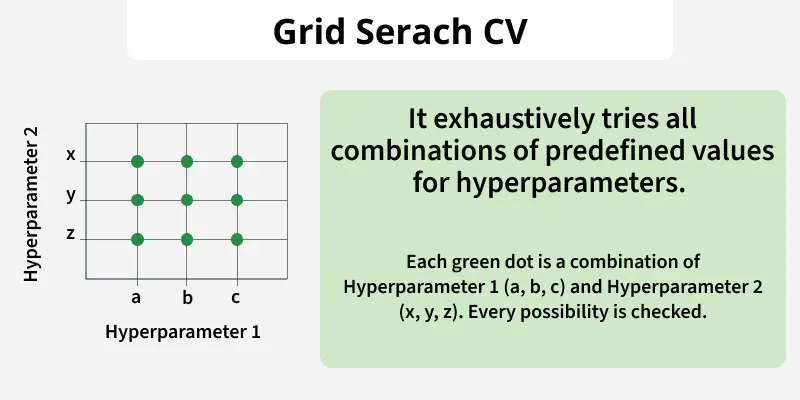

GridSearchCV is a brute-force technique for hyperparameter tuning. It trains the model using all possible combinations of specified hyperparameter values to find the best-performing setup. It is slow and uses a lot of computer power which makes it hard to use with big datasets or many settings. It works using below steps:

* Create a grid of potential values for each hyperparameter.
* Train the model for every combination in the grid.
* Evaluate each model using cross-validation.
* Select the combination that gives the highest score.

C = [0.1, 0.2, 0.3, 0.4, 0.5]
Alpha = [0.01, 0.1, 0.5, 1.0]

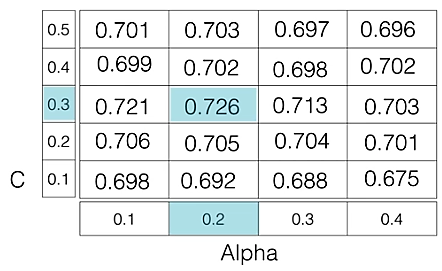

The grid search technique will construct multiple versions of the model with all possible combinations of C and Alpha, resulting in a total of 5 * 4 = 20 different models. The best-performing combination is then chosen.

Example: Tuning Logistic Regression with GridSearchCV
The following code illustrates how to use GridSearchCV . In this below code:

* We generate sample data using make_classification.
* We define a range of C values using logarithmic scale.
* GridSearchCV tries all combinations from param_grid and uses 5-fold cross-validation.
* It returns the best hyperparameter (C) and its corresponding validation score

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

logreg_cv.fit(X, y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.853


This represents the highest accuracy achieved by the model using the hyperparameter combination C = 0.0061. The best score of 0.853 means the model achieved 85.3% accuracy on the validation data during the grid search process.

## 2. RandomizedSearchCV 

As the name suggests RandomizedSearchCV picks random combinations of hyperparameters from the given ranges instead of checking every single combination like GridSearchCV.

* In each iteration it tries a new random combination of hyperparameter values.
* It records the model’s performance for each combination.
* After several attempts it selects the best-performing set.

#### Example: Tuning Decision Tree with RandomizedSearchCV

The following code illustrates how to use RandomizedSearchCV. In this example:

* We define a range of values for each hyperparameter e.g, max_depth, min_samples_leaf etc.
* Random combinations are picked and evaluated using 5-fold cross-validation.
* The best combination and score are printed.

In [2]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 3}
Best score is 0.834


## 3. Bayesian Optimization

Grid Search and Random Search can be inefficient because they blindly try many hyperparameter combinations, even if some are clearly not useful. Bayesian Optimization takes a smarter approach. It treats hyperparameter tuning like a mathematical optimization problem and learns from past results to decide what to try next.

* Build a probabilistic model (surrogate function) that predicts performance based on hyperparameters.
* Update this model after each evaluation.
* Use the model to choose the next best set to try.
* Repeat until the optimal combination is found. The surrogate function models:
* The relationship between hyperparameters and model performance.
* The uncertainty in these predictions.

Here the surrogate function models the relationship between hyperparameters 
x and the score 
y. By updating this model iteratively with each new evaluation Bayesian optimization makes more informed decisions. Common surrogate models used in Bayesian optimization include:

* Gaussian Processes
* Random Forest Regression
* Tree-structured Parzen Estimators (TPE)

## Advantages of Hyperparameter tuning

* Improved Model Performance: Properly tuned hyperparameters can significantly enhance a model's accuracy and generalization capabilities.
* Efficient Resource Utilization: Techniques like Random Search and Bayesian Optimization can find optimal hyperparameters faster than exhaustive methods like Grid Search, saving computational resources.
* Better Generalization: Tuning helps in avoiding overfitting or underfitting, leading to models that perform well on unseen data.

## Challenges

* Computational Cost: Hyperparameter tuning can be resource-intensive, especially for complex models and large datasets.
* Curse of Dimensionality: As the number of hyperparameters increases, the search space grows exponentially, making it harder to find the optimal combination.
* Overfitting to Validation Set: Excessive tuning on a validation set can lead to overfitting, where the model performs well on validation data but poorly on new, unseen data.